NAMA : MUHAMMAD RIDWAN WIBISONO <br>
NIM : 211351098<br>
KELAS : TIF MALAM A

# Import Dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadridwanw","key":"5fbef33486f5340eeef5710c110fb131"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d uciml/zoo-animal-classification

  0% 0.00/1.85k [00:00<?, ?B/s]
100% 1.85k/1.85k [00:00<00:00, 3.61MB/s]


In [5]:
!unzip zoo-animal-classification.zip -d animal
!ls animal

Archive:  zoo-animal-classification.zip
  inflating: animal/class.csv        
  inflating: animal/zoo.csv          
class.csv  zoo.csv


# Import Library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Data Discovery

In [7]:
data_zoo = pd.read_csv("animal/zoo.csv")
data_class = pd.read_csv("animal/class.csv")
display(data_zoo.head())
display(data_class)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [8]:
class_types = list(data_class['Class_Type'])
class_types

['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

In [9]:
class_map = {}
for i in range(data_class.shape[0]):
    class_map[data_class['Class_Number'].iloc[i]] = data_class['Class_Type'].iloc[i]

class_map

{1: 'Mammal',
 2: 'Bird',
 3: 'Reptile',
 4: 'Fish',
 5: 'Amphibian',
 6: 'Bug',
 7: 'Invertebrate'}

In [10]:
data = pd.merge(data_zoo, data_class, how='left', left_on='class_type', right_on='Class_Number')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [11]:
## Droping columns that are repeating and not useful
data.drop(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Animal_Names'], axis=1, inplace=True)
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


In [12]:
data.shape

(101, 19)

In [13]:
data.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
Class_Type     0
dtype: int64

<Axes: >

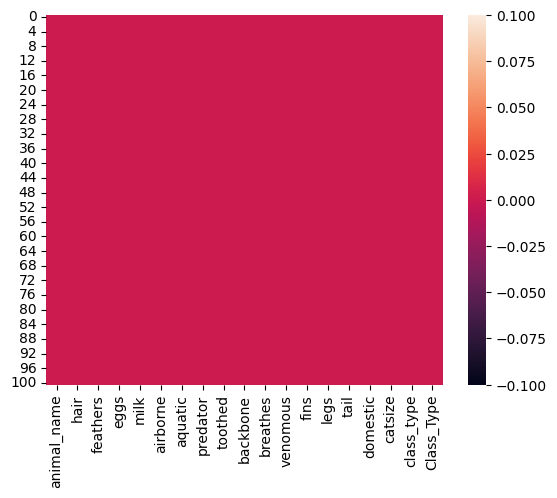

In [14]:
sns.heatmap(data.isnull())

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
 18  Class_Type   101 non-null    object
dtypes: int64(17), object(2)
memor

# EDA (Exploratory Data Analysis)

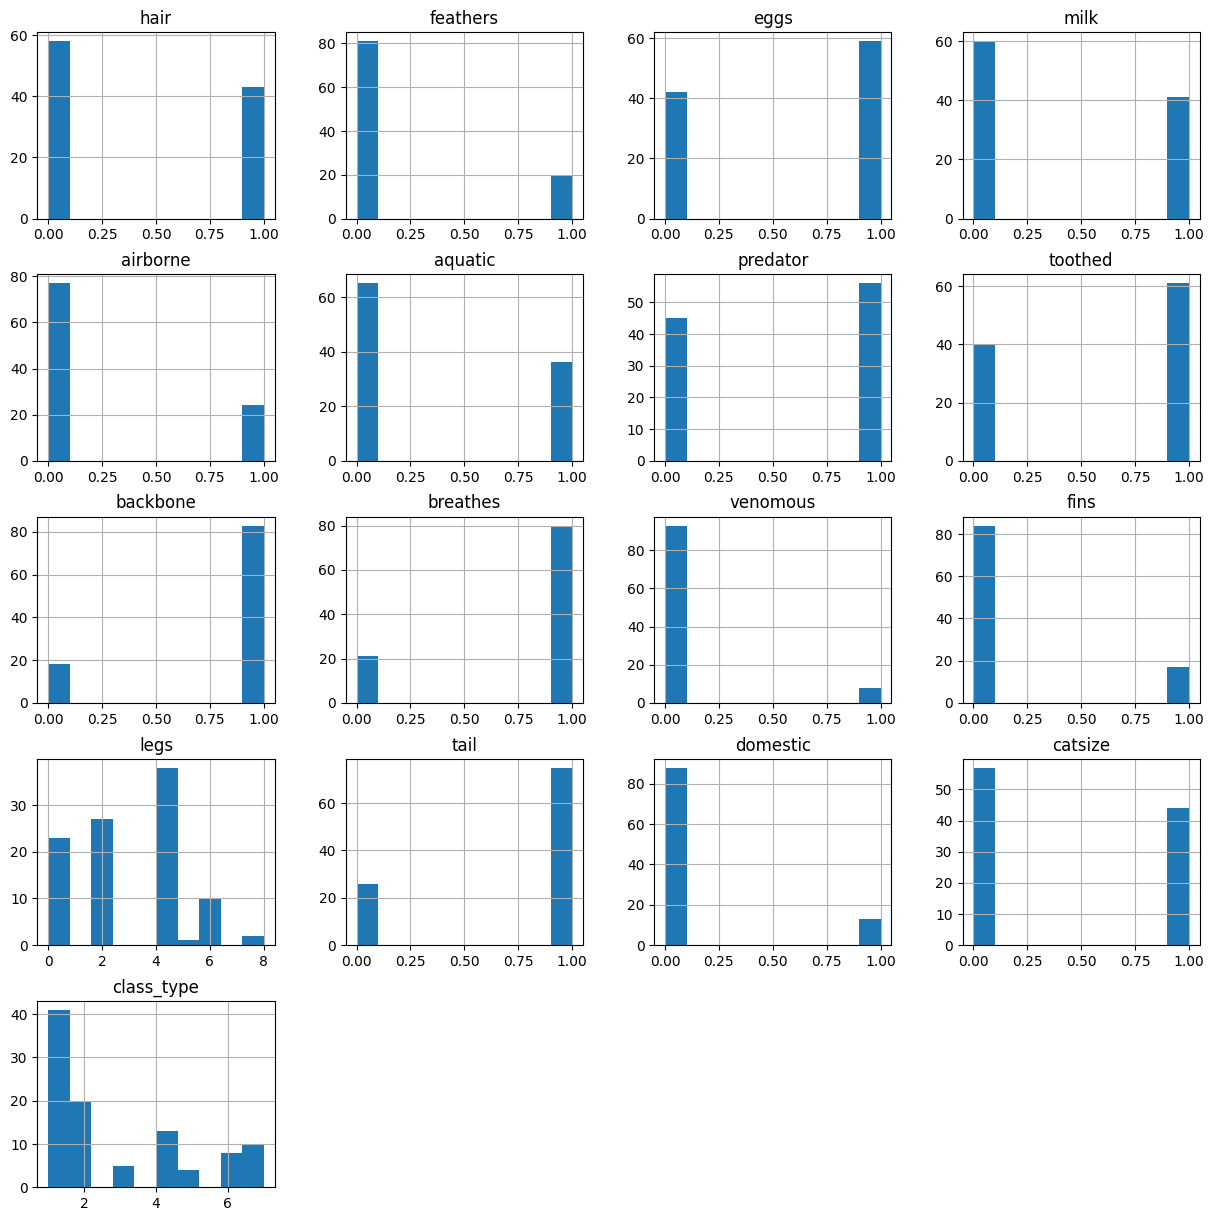

In [16]:
data.hist(bins=10,figsize=(15,15))
plt.show()

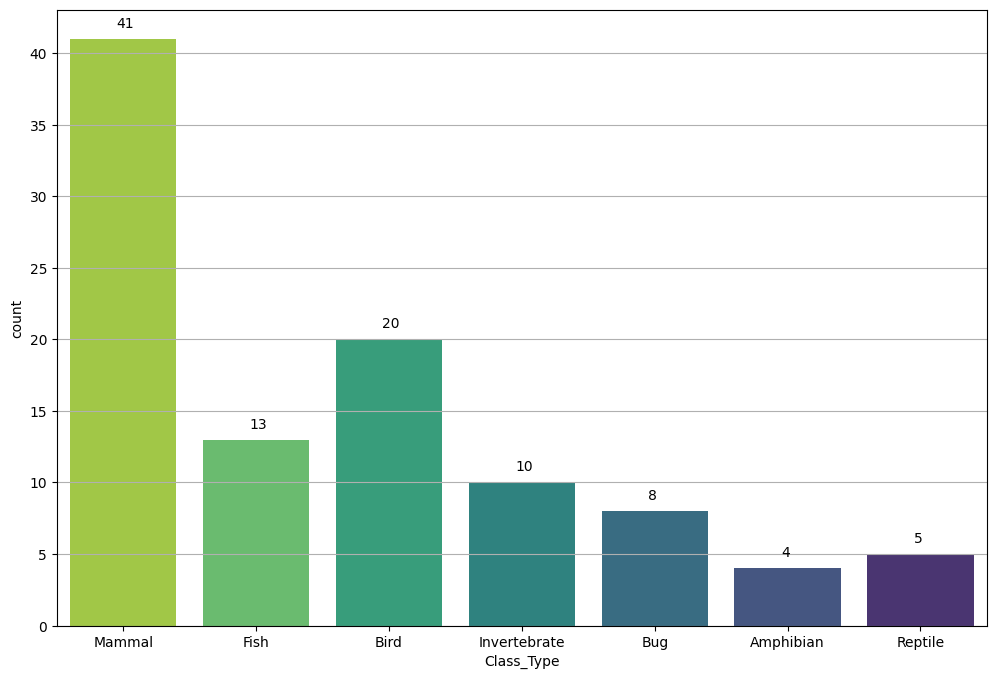

In [17]:
# Visualizer 'Class_Type'.
plt.figure(figsize = (12,8))
plt.grid(True)
ax = sns.countplot(x='Class_Type', data=data, palette='viridis_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.8))

In [18]:
# Check the proportion within the target variable 'Class_Type'.
ex.pie(data,names='Class_Type',title='Proportion of different classes',hole=0.33)

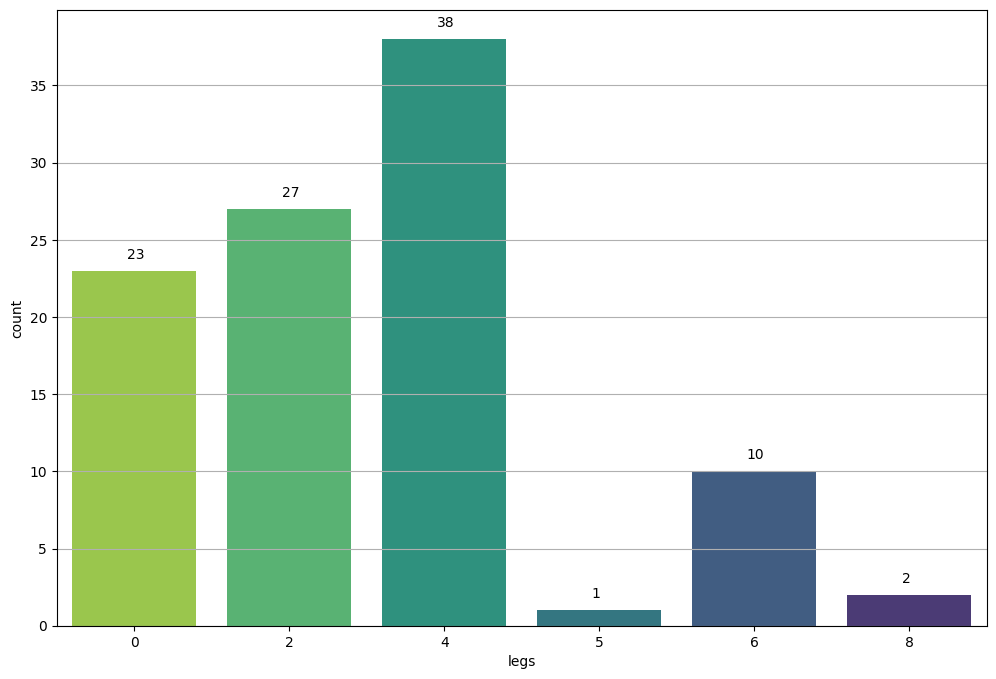

In [19]:
# Visualizer 'legs'.
plt.figure(figsize = (12,8))
plt.grid(True)
ax = sns.countplot(x='legs', data=data, palette='viridis_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.8))

In [20]:
# Check the proportion within the target variable 'legs'.
ex.pie(data,names='legs',title='Percentage of different legs',hole=0.33)

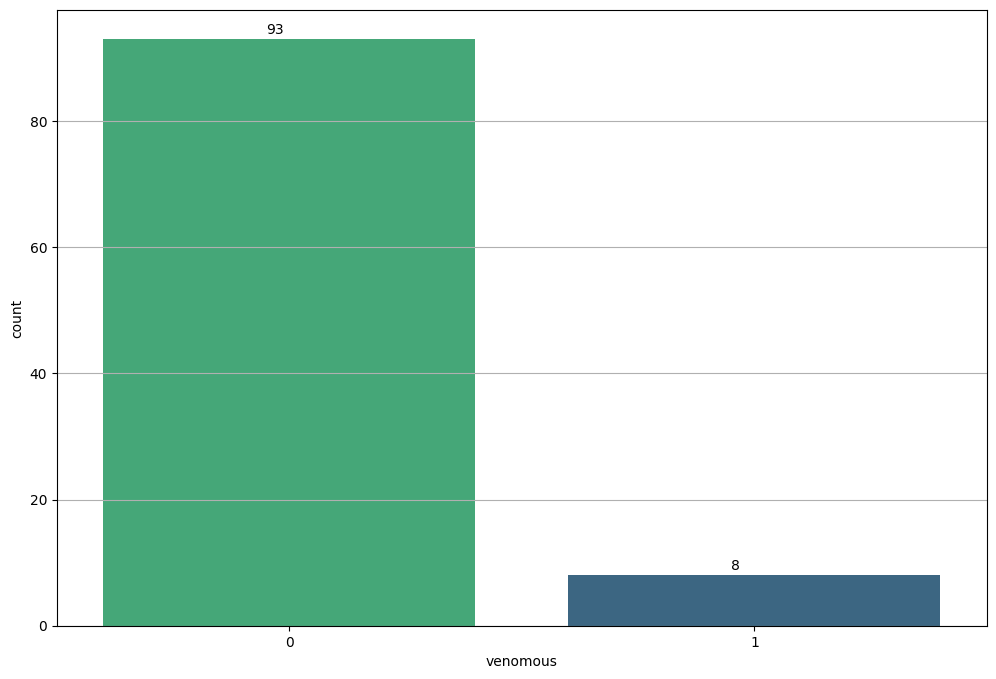

In [21]:
# Visualizer 'venomous'.
plt.figure(figsize = (12,8))
plt.grid(True)
ax = sns.countplot(x='venomous', data=data, palette='viridis_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.8))

In [22]:
# Check the proportion within the target variable 'venomous'.
ex.pie(data,names='venomous',title='Proportion of different venomous',hole=0.33)

# Preprocessing

In [23]:
# Seperating all the categories of animals in a dictionary
animal_type = {}
animal_category = data.Class_Type.unique()
print("Seperating Categories...")
for category in animal_category:
    animal_type[category] = data[data['Class_Type']==category]
print("Seperation Completed.")

Seperating Categories...
Seperation Completed.


In [24]:
#Here we will split every category into trainig and test data
SPLIT = 0.85
train = pd.DataFrame() #to combine all the splited traning data from all categories
test = pd.DataFrame() #to combine all the splited test data from all categories
for category_name in animal_type:
    m = int(animal_type[category_name].shape[0] * SPLIT)
    train = pd.concat([train, animal_type[category_name].iloc[: m, :]])
    test = pd.concat([test, animal_type[category_name].iloc[m:, :]])

#Shuffling the train and test data randomly
train = train.sample(frac=1)
test = test.sample(frac=1)

In [25]:
print(f"Training data shape = {train.shape}")
print(f"Testing data shape = {test.shape}")

Training data shape = (83, 19)
Testing data shape = (18, 19)


In [26]:
train.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
71,rhea,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1,2,Bird
65,pony,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,Mammal
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4,Fish
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,Invertebrate
34,haddock,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,Fish


In [27]:
# We have already split the data into 85% train and 15% test data
X_train = train.iloc[:,1:-2] # not using animal_name and class_type and Class_Type(category of animal)
y_train = train.iloc[:, -2] # class_type is the dependent feature
X_test = test.iloc[:, 1:-2]
y_test = test.iloc[:, -2]

# Modeling

In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [29]:
np.unique(y_pred), np.unique(y_test)

(array([1, 2, 3, 4, 5, 6, 7]), array([1, 2, 3, 4, 5, 6, 7]))

In [30]:
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred)}")
print(metrics.classification_report(y_test, y_pred))

Accuracy = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [31]:
prediction_df = X_test
prediction_df['class_type'] = [class_map[i] for i in y_test]
prediction_df['pred_class_type'] = [class_map[i] for i in y_pred]
prediction_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,pred_class_type
95,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,Bird,Bird
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,Fish,Fish
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,Bug,Bug
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrate,Invertebrate
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,Bird,Bird
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal,Mammal
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1,Mammal,Mammal
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,Bird,Bird
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mammal,Mammal
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,Mammal,Mammal


In [32]:
#tried manually with human feature values
predd = {}
predd['hair'] = 1
predd['feathers'] = 0
predd['eggs'] = 0
predd['milk'] = 1
predd['airborne'] = 0
predd['aquatic'] = 0
predd['predator'] = 1
predd['toothed'] = 1
predd['backbone'] = 1
predd['breathes'] = 1
predd['venomous'] = 0
predd['fins'] = 0
predd['legs'] = 2
predd['tail'] = 0
predd['domestic'] = 0
predd['catsize'] = 0

pred_df = pd.DataFrame(data=predd, index=['value'])
custom_pred = dtc.predict(pred_df)
print('Class Type :', class_map[custom_pred[0]])

Class Type : Mammal


# Visualisasi Hasil Algoritma

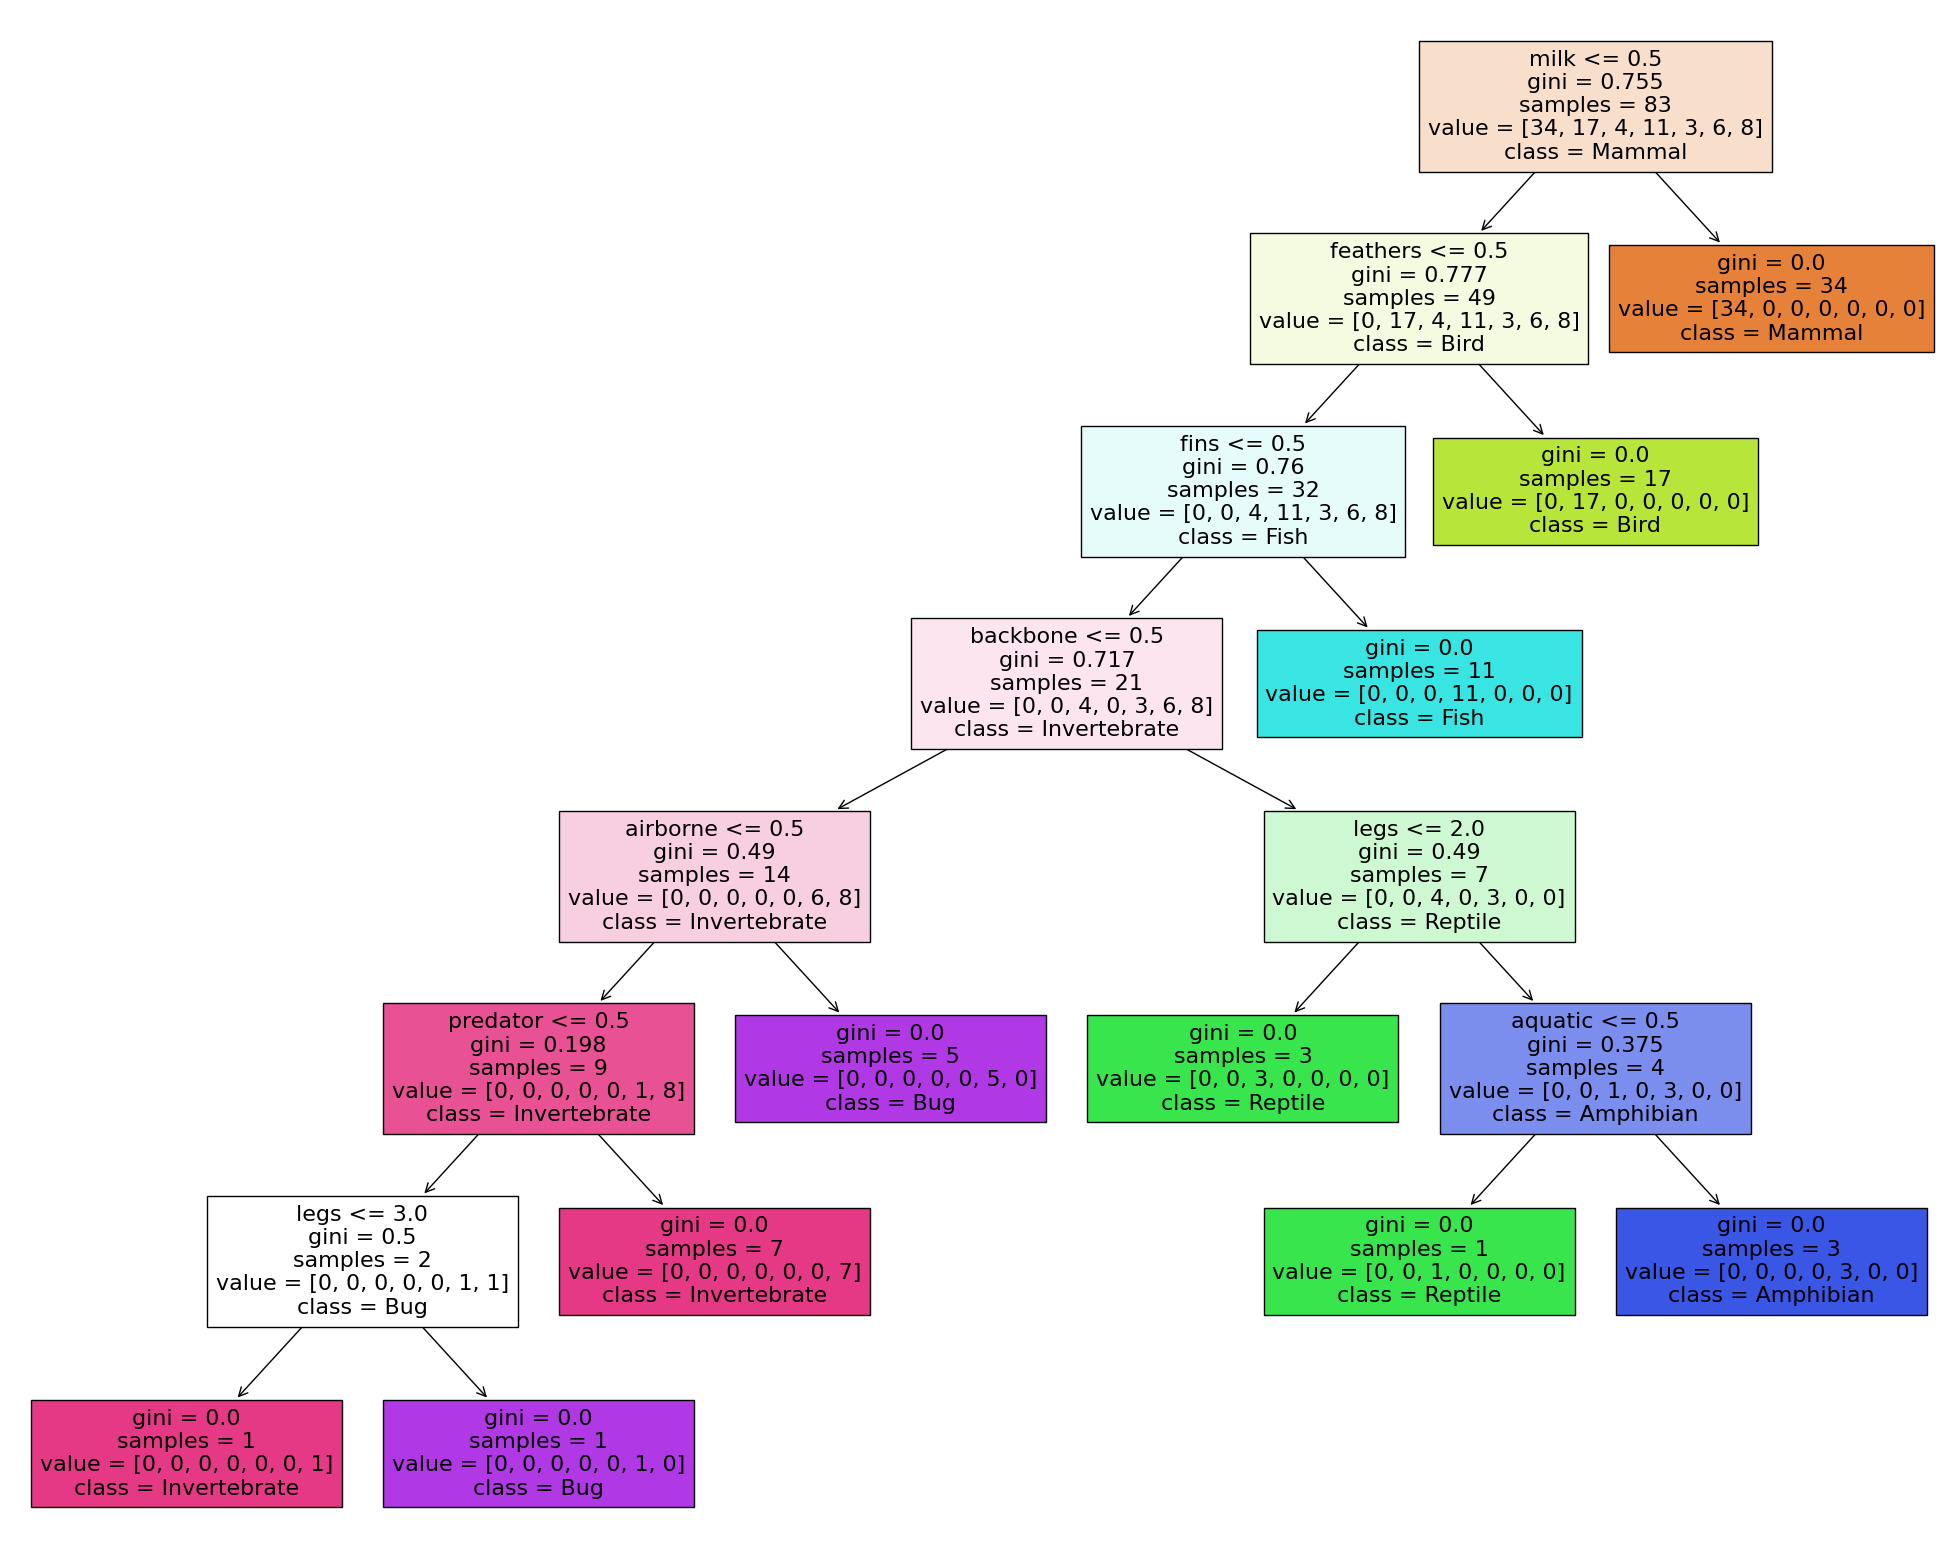

In [33]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, feature_names=X_train.columns,
                class_names=class_types, filled=True)

<Axes: >

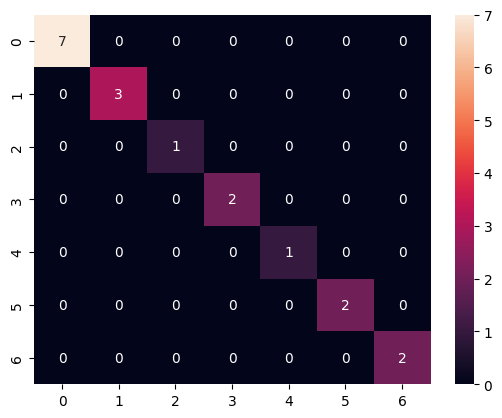

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

# Save Model (pickle)

In [35]:
filename = "animal_model.sav"
pickle.dump(dtc,open(filename,'wb'))